# Task 1 - Quantium
## Data preparation and customer analytics
**Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.**

### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import DateFormatter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading files

In [2]:
transaction_data = pd.read_excel(r'D:\Quantium\QVI_transaction_data.xlsx')
customer_data = pd.read_csv(r'D:\Quantium\QVI_purchase_behaviour.csv')

In [3]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Descriptive Statistics

- To provide full Summary Statistics
- **Here we can see that the mean and standard deviation is extremely high in Transaction id and LYLTY card number this can be due to outliers we will check this further**

In [7]:
transaction_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,264836.0,43464.036260,105.389282,43282.0,43373.0,43464.0,43555.00,43646.0
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


In [3]:
transaction_data.shape

(264836, 8)

In [4]:
transaction_data.TXN_ID.nunique()

263127

**TXN_ID is not unique to each row. This is because there can be sales of chips with different brands in a single transaction.**

In [6]:
transaction_data[transaction_data.duplicated(['TXN_ID'])]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
...,...,...,...,...,...,...,...,...
264287,43429,248,248085,250293,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4
264318,43578,248,248338,250624,106,Natural ChipCo Hony Soy Chckn175g,2,6.0
264528,43376,259,259038,257645,41,Doritos Salsa Mild 300g,2,5.2
264535,43347,259,259056,257775,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2


In [7]:
transaction_data.loc[transaction_data['TXN_ID']==48887,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,43605,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.60


In [11]:
transaction_data.loc[transaction_data['TXN_ID']==7739,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
376,43475,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.8
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4


In [12]:
transaction_data.loc[transaction_data['TXN_ID']==10982,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
418,43391,12,12301,10982,50,Tostitos Lightly Salted 175g,2,8.8
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8


In [13]:
transaction_data.loc[transaction_data['TXN_ID']==14546,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
475,43351,16,16427,14546,99,Pringles Sthrn FriedChicken 134g,1,3.7
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7


In [14]:
transaction_data.loc[transaction_data['TXN_ID']==16683,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
510,43315,19,19272,16683,7,Smiths Crinkle Original 330g,2,11.4
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


### No Missing values in transaction data,  happy moment :)

In [8]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

### But,... there is problem in data type of column DATE

In [9]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [10]:
list(transaction_data.columns)



['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [11]:
transaction_data.DATE.head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

**Transaction date is not in correct format as it is in integer type we have to convert it into datetype.**

In [8]:
# Date is not in the right format

# Function that converts Excel integer into yyyy-mm-dd format
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [9]:
transaction_data['DATE']= transaction_data['DATE'].apply(xlseriesdate_to_datetime)


In [10]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


**Extract weights out of 'PROD_NAME'. As this feature contain the text data so we are gonna play with that a little more**

In [21]:
transaction_data.PROD_NAME

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [11]:

#ab+ will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’.
transaction_data['PROD_SIZE']=transaction_data.PROD_NAME.str.extract("(\d+)")
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [32]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   PROD_SIZE       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


**Now change the datatype of product size**

In [12]:

transaction_data['PROD_SIZE'] = pd.to_numeric(transaction_data['PROD_SIZE'])
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   PROD_SIZE       264836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.2+ MB


**text cleaning function for the feature product name to clean the feature a little more**

In [13]:

# * Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible. ab* will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s.
def clean_txt(text):
    # remove special characters '&' and '/'
    text = re.sub('[&/]',' ',text)
     # remove product weights
    text = re.sub('\d\w*',' ',text)
    return text

# now apply it

transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(clean_txt)
    

In [14]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


**Now applying the word tokenization to find out the frequency of words in feature product name**

In [34]:
# to apply word tokenize
cleantext = transaction_data['PROD_NAME']
string = ' '.join(cleantext)



In [134]:
token = word_tokenize(string)
token[0:5]

['Natural', 'Chip', 'Compny', 'SeaSalt', 'CCs']

In [46]:
# Apply 'fdist' function which computes the frequency of each token and put it into a dataframe
frequency = fdist(token)
frequency

FreqDist({'Chips': 49770, 'Kettle': 41288, 'Smiths': 28860, 'Salt': 27976, 'Cheese': 27890, 'Pringles': 25102, 'Doritos': 24962, 'Crinkle': 23960, 'Corn': 22063, 'Original': 21560, ...})

**It's time to see the word cloud of out text feature**

In [21]:
from wordcloud import WordCloud

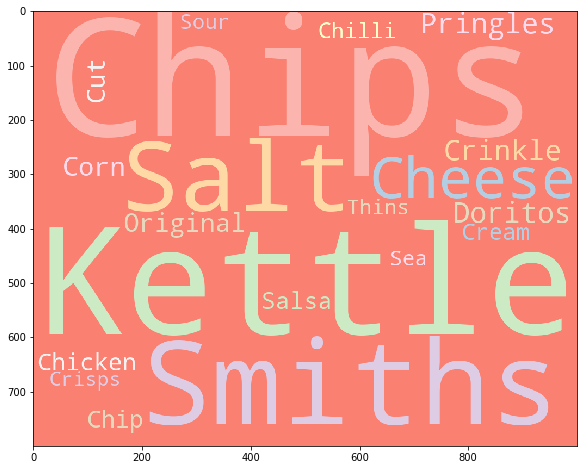

In [55]:
from PIL import Image
import matplotlib.pyplot as plt

wc = WordCloud(background_color="salmon",colormap = 'Pastel1',width=1000,height=800, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(frequency)
plt.figure(figsize=(15, 8))
plt.imshow(wc)
plt.show()

In [18]:
freq_df = pd.DataFrame(list(frequency.items()),columns = ['Words','Frequency']).sort_values(by='Frequency',ascending=False)
freq_df

,Words,Frequency
10,Chips,49770
16,Kettle,41288
7,Smiths,28860
28,Salt,27976
6,Cheese,27890
...,...,...
182,Sunbites,1432
196,Pc,1431
52,Garden,1419
51,NCC,1419


**Drop rows with salsa word in PROD_NAME**

In [56]:

transaction_data['PROD_NAME']= transaction_data['PROD_NAME'].apply(lambda x: x.lower())# convert to lowercase
transaction_df = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa')]
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,smiths chip thinly s cream onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny jlpno chili,3,13.8,150


In [57]:
#The title() method returns a string where the first character in every word is upper case. Like a header, or a title.
transaction_df.PROD_NAME = transaction_df.PROD_NAME.apply(lambda x: x.title())
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150


**Checking and correcting other features: Product quantity and LYLTY_CARD_NBR**

In [58]:
# Value counts of PROD_QTY
transaction_df['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

We have two occurences of 200 in the dataset. This seems odd so let's explore further.

In [59]:
transaction_df.loc[transaction_df.PROD_QTY==200,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


Both these transactions have been made by the same person at the same store. Let's see all the transactions this person has made by tracking his loyalty card number

In [44]:
transaction_df.loc[transaction_df.LYLTY_CARD_NBR==226000,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


This customer has only made two transactions over the entire year so unlikely to be a retail customer. He/she is most likely purchasing for commercial purposes so it is safe for us to drop these customer from both 'transactionData' and 'customerData' dataset.

In [60]:
transaction_df.drop(transaction_df.index[transaction_df.LYLTY_CARD_NBR==226000],inplace=True)
transaction_df.loc[transaction_df.LYLTY_CARD_NBR==226000,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE


**Analyzing out Date column to know more about total sales according to time**

In [46]:
# Now let's examine the number of transactions over time to see if there are any obvious data issues e.g. missing data
transaction_df.DATE.nunique()

364

In [61]:
print('min of date:',min(transaction_df.DATE))
print('max of date:',max(transaction_df.DATE))

min of date: 2018-07-01 00:00:00
max of date: 2019-06-30 00:00:00


In [116]:
# Look for the missing date
#The difference() method in Python returns the difference between two given sets.
pd.date_range(start= '2018-07-01',end='2019-06-30').difference(transaction_df.DATE)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

We have a missing date on Christmas Day. This makes sense because most retail stores are closed that day.

In [117]:
# Create a new dataframe which contains the total sale for each date
sale = pd.pivot_table(transaction_df,values = 'TOT_SALES',index  ='DATE', aggfunc = 'sum' )
sale

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0
...,...
2019-06-26,4829.7
2019-06-27,4941.3
2019-06-28,4876.6


In [118]:
df = pd.DataFrame(index = pd.date_range(start='2018-07-01',end='2019-06-30'))
df.head()

""
2018-07-01
2018-07-02
2018-07-03
2018-07-04
2018-07-05


In [119]:
df['TOT_SALES']=0
df.head()

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0


In [120]:
df2 = sale + df
df2.head()

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [121]:
df2.isnull().sum()

TOT_SALES    1
dtype: int64

In [122]:
df2.fillna(0,inplace=True)
df2.index.name = 'DATE'
df2.rename(columns={'TOT_SALES':'Total Sales'},inplace  = True)
df2.head()

,Total Sales
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


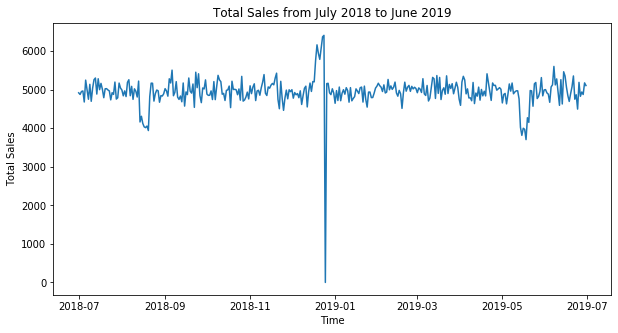

In [60]:
time = df2.index
sale = df2['Total Sales']
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(time,sale)

formate = DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(formate)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

We can see that sales spike up during the December month and zero sale on Christmas Day.

In [123]:
# look at december month only
december = df2[(df.index< '2019-01-01') & (df.index> '2018-11-30')]
december.head()

,Total Sales
DATE,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


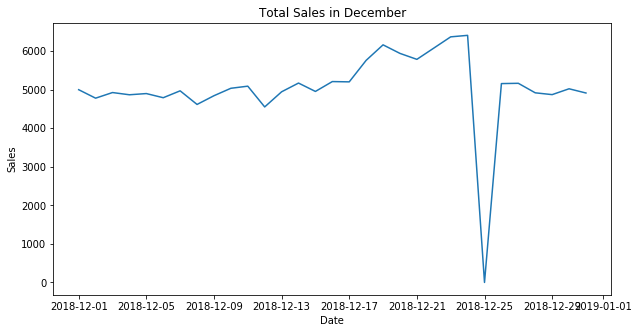

In [64]:
plt.figure(figsize=(10,5))
plt.plot(december)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total Sales in December')
plt.show()

In [124]:
december.reset_index(drop = True,inplace = True)
december['Date'] = december.index + 1
december.head()

,Total Sales,Date
0,5000.9,1
1,4781.1,2
2,4927.0,3
3,4869.4,4
4,4900.5,5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

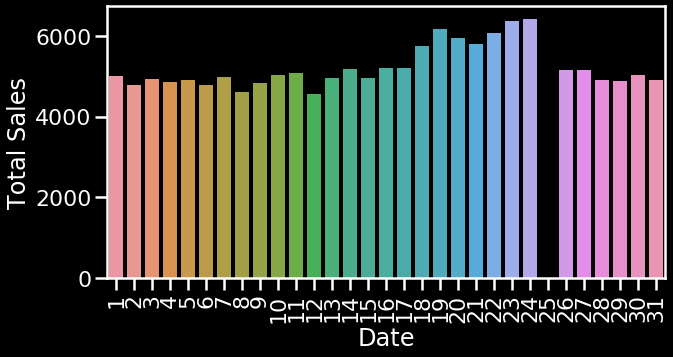

In [126]:
plt.figure(figsize  = (10,5))
sns.barplot(x = 'Date',y='Total Sales',data  = december)
plt.xticks(rotation=90)

Now, we move on to PACK_SIZE that we created at the beginning by extracting the weight from the PROD_NAME column.

In [62]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150


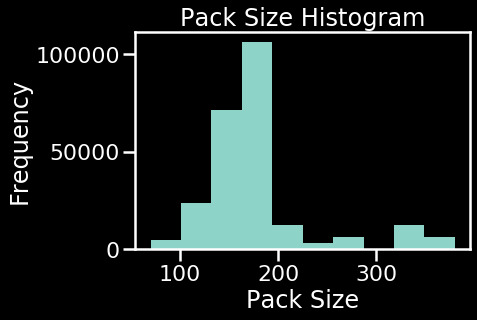

In [100]:
plt.hist(transaction_df.PROD_SIZE)
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Pack Size Histogram')
plt.show()

**Extracting Brand name from the text feature that is prodcuct name**

In [63]:
partition = transaction_df.PROD_NAME.str.partition()
partition[0]

0          Natural
1              Ccs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: 0, Length: 246740, dtype: object

In [64]:
transaction_df['BRAND'] = partition[0]
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150,Kettle


In [65]:
transaction_df.BRAND.unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [66]:
# Rename brand names for consistency

transaction_df['BRAND'].replace('Ncc', 'Natural', inplace = True)
transaction_df['BRAND'].replace('Ccs', 'CCS', inplace = True)
transaction_df['BRAND'].replace('Smith', 'Smiths', inplace = True)
transaction_df['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transaction_df['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transaction_df['BRAND'].replace('Ww', 'Woolworths', inplace = True)
transaction_df['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transaction_df['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transaction_df['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transaction_df['BRAND'].unique()

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [96]:
transaction_df.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           390239.8
Doritos          226329.9
Smiths           217492.0
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Grainwaves        51617.2
Natural           42318.0
Woolworths        41059.1
Cheezels          40029.9
CCS               18078.9
Cheetos           16884.5
Sunbites           9676.4
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

In [91]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   PROD_SIZE       246740 non-null  int64         
 9   BRAND           246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


In [102]:
transaction_df.PROD_SIZE.unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

## Data Visualization

### Product Size and Total Sales

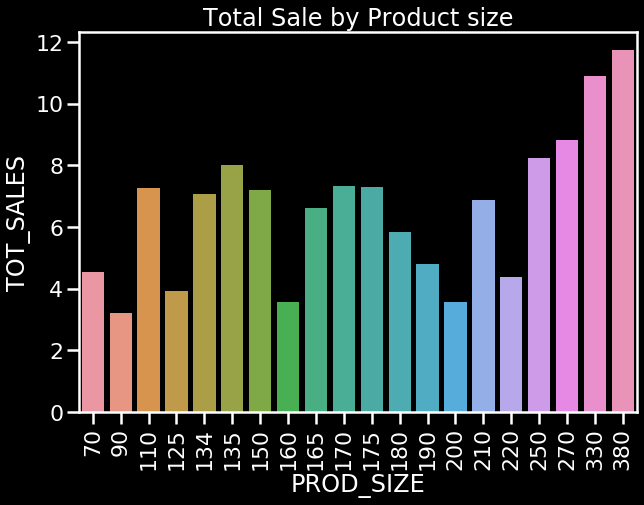

In [104]:
plt.figure(figsize=(10,7))
sns.barplot(x='PROD_SIZE',y='TOT_SALES',ci=False,data = transaction_df)
plt.title('Total Sale by Product size')
plt.xticks(rotation=90)
plt.show()

**Product size 250, 270, 330 and 380 are generating more Sales**

### Product Size and total sales scatter plot

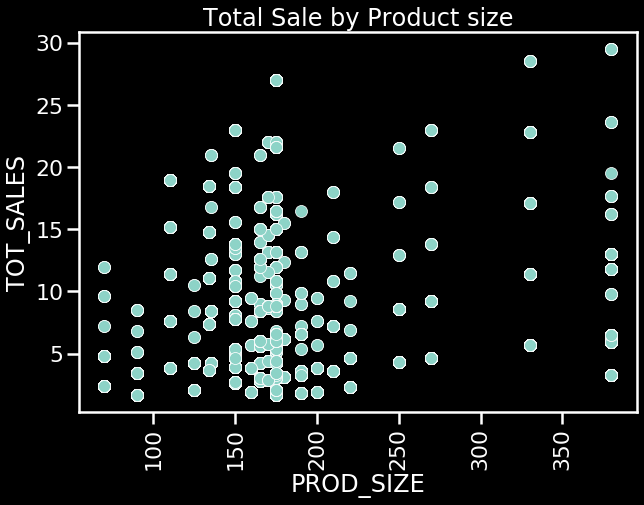

In [109]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='PROD_SIZE',y='TOT_SALES',data = transaction_df)
plt.title('Total Sale by Product size')
plt.xticks(rotation=90)
plt.show()

### Product quantity and Total Sales

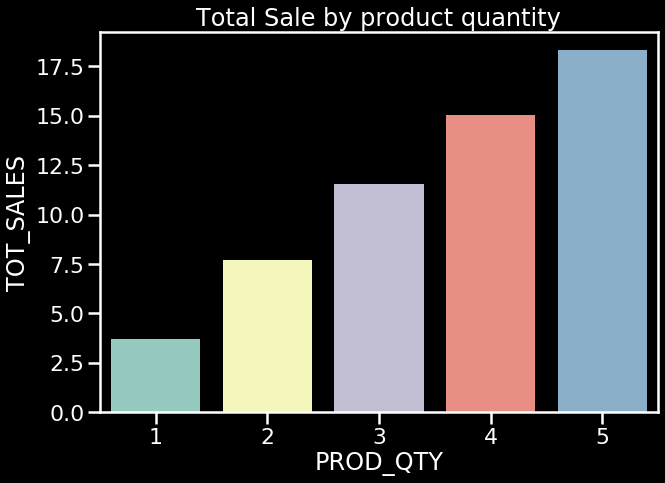

In [106]:
plt.figure(figsize=(10,7))
sns.barplot(x='PROD_QTY',y='TOT_SALES',ci=False,data = transaction_df)
plt.title('Total Sale by product quantity')
plt.show()

**product quantity 4 and 5 is generating higher amount of Sales**

### Product quantity with total sales box plot

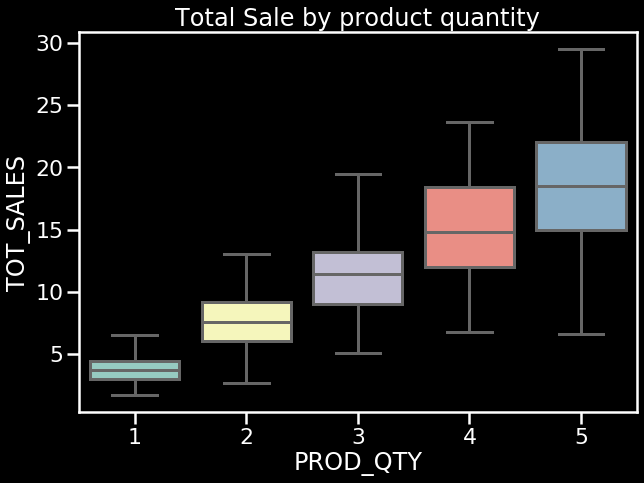

In [107]:
plt.figure(figsize=(10,7))
sns.boxplot(x='PROD_QTY',y='TOT_SALES',data = transaction_df)
plt.title('Total Sale by product quantity')
plt.show()

### Transaction Id and Total Sales

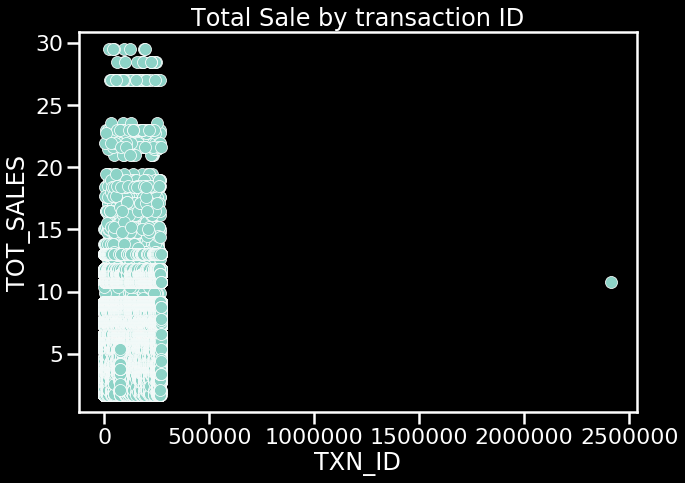

In [112]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='TXN_ID',y='TOT_SALES',data = transaction_df)
plt.title('Total Sale by transaction ID')
#plt.xticks(rotation=90)
plt.show()

**We can clearly see that we have outlier in transaction id that we can remove for better model**

In [113]:
transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_SIZE', 'BRAND', 'MONTH',
       'DAY', 'YEAR'],
      dtype='object')

### LYLTY_CARD_NBR with Total sales

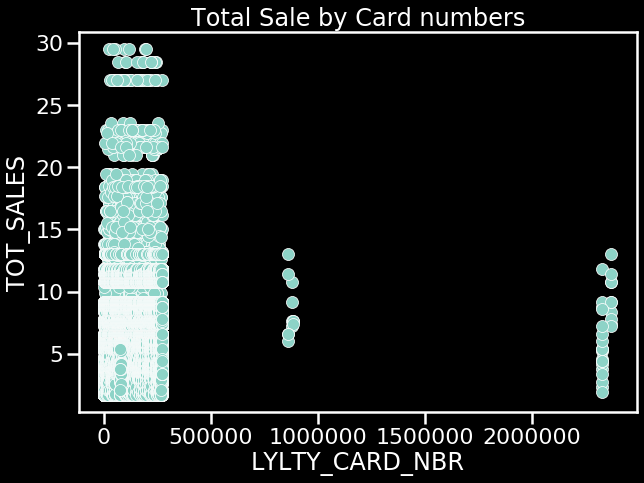

In [114]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='LYLTY_CARD_NBR',y='TOT_SALES',data = transaction_df)
plt.title('Total Sale by Card numbers')
#plt.xticks(rotation=90)
plt.show()

**We have extreme outliers in this features also that we have to remove from the dataset**

### Product number with total sales

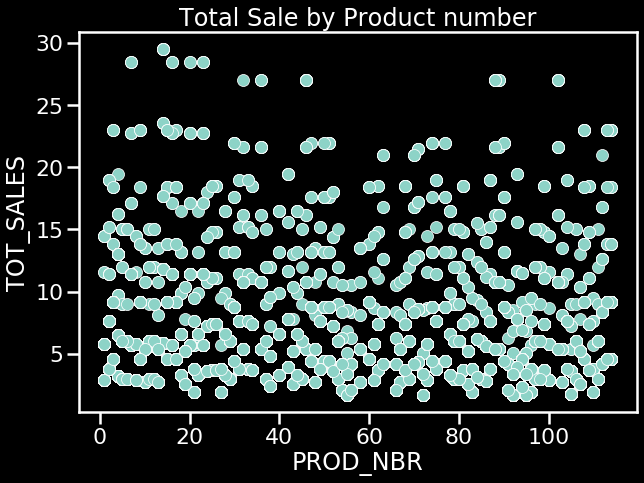

In [115]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='PROD_NBR',y='TOT_SALES',data = transaction_df)
plt.title('Total Sale by Product number')
#plt.xticks(rotation=90)
plt.show()

**Deriving date, month and year from date column**

In [92]:
transaction = transaction_df.copy()
transaction['MONTH'] = transaction.DATE.dt.month
transaction['DAY'] = transaction.DATE.dt.day
transaction['YEAR']=transaction.DATE.dt.year
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   PROD_SIZE       246740 non-null  int64         
 9   BRAND           246740 non-null  object        
 10  MONTH           246740 non-null  int64         
 11  DAY             246740 non-null  int64         
 12  YEAR            246740 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(2)
memory usage: 26.4+ MB


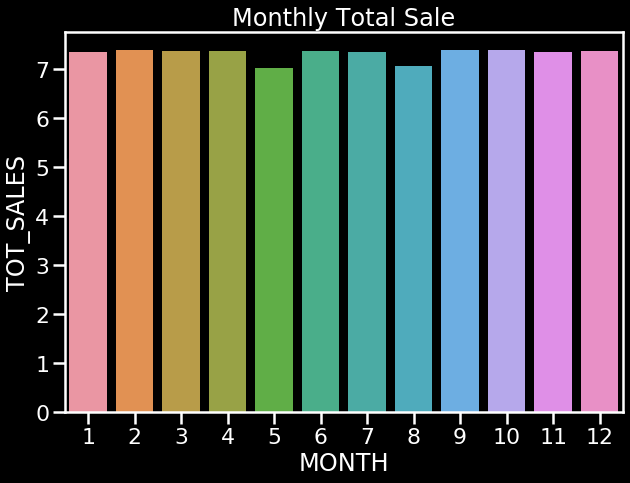

In [96]:
plt.style.use('dark_background')
sns.set_context("poster")
plt.figure(figsize=(10,7))
sns.barplot(x='MONTH',y='TOT_SALES',ci=False,data = transaction)
plt.title('Monthly Total Sale')
plt.show()

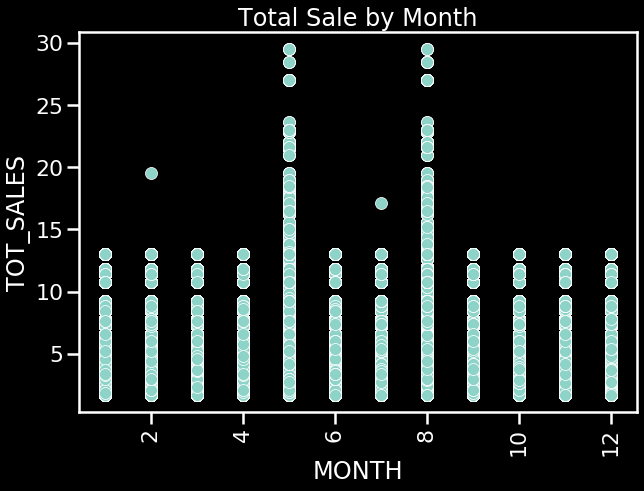

In [111]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='MONTH',y='TOT_SALES',data = transaction)
plt.title('Total Sale by Month')
plt.xticks(rotation=90)
plt.show()

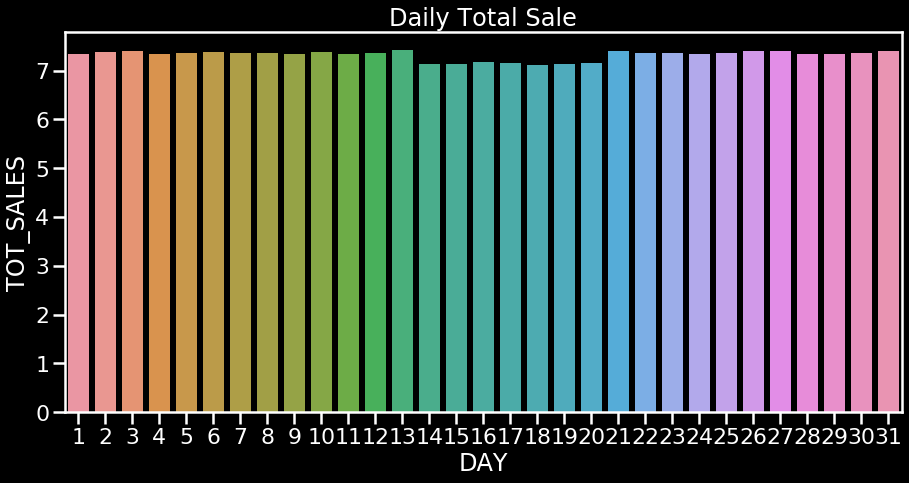

In [98]:
plt.figure(figsize=(15,7))
sns.barplot(x='DAY',y='TOT_SALES',ci=False,data = transaction)
plt.title('Daily Total Sale')
plt.show()

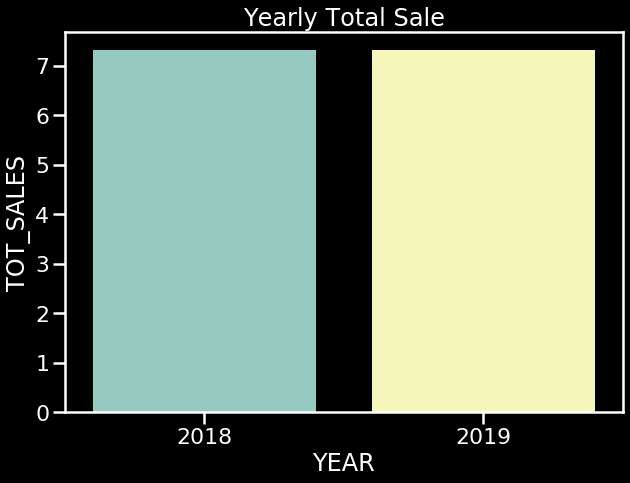

In [99]:
plt.figure(figsize=(10,7))
sns.barplot(x='YEAR',y='TOT_SALES',ci=False,data = transaction)
plt.title('Yearly Total Sale')
plt.show()

## Moving on to Customer data

In [97]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [98]:
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [99]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [100]:
customer_data.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [67]:
customer_data.LIFESTAGE.value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

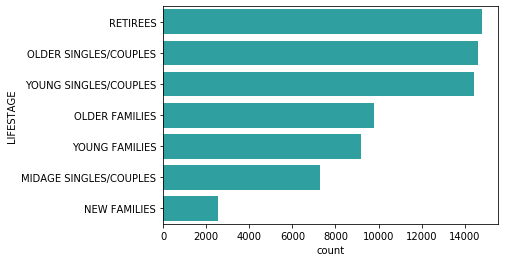

In [105]:
sns.countplot(y = customer_data['LIFESTAGE'], order = customer_data['LIFESTAGE'].value_counts().index, color = "#1CB3B1")

In [106]:
customer_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [108]:
customer_data['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

### Customer Segmentation

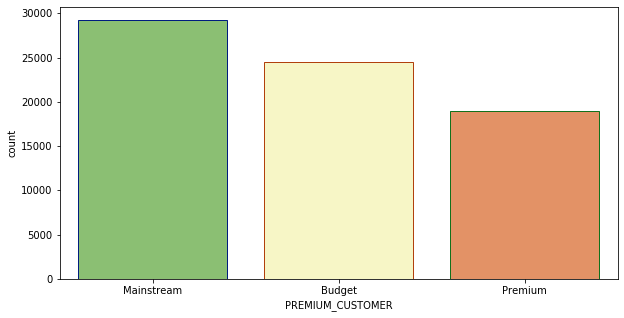

In [109]:
plt.figure(figsize = (10,5))
sns.countplot(customer_data.PREMIUM_CUSTOMER, order = customer_data.PREMIUM_CUSTOMER.value_counts().index, palette ='RdYlGn_r', 
              edgecolor = sns.color_palette('dark',9) )


In [68]:
# Merge Transaction and Customer data
final_data  = pd.merge(transaction_df,customer_data)
final_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [69]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PROD_SIZE         246740 non-null  int64         
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


## Analysing Customer behavious
- Who spends the most on chips, describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What is the average chip price by customer segment

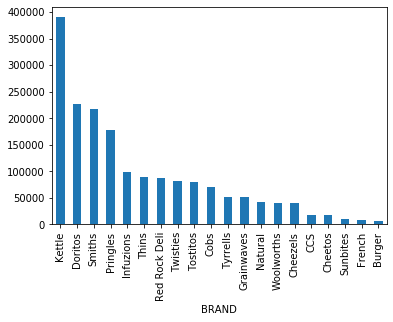

In [75]:
brand =final_data.groupby('BRAND')['TOT_SALES'].sum()
brand.sort_values(ascending = False).plot(kind='bar')

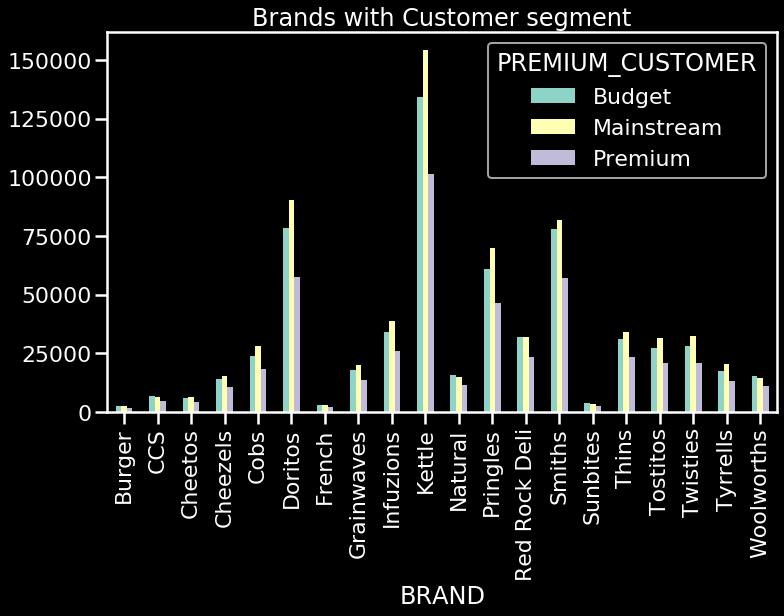

In [127]:
segment = final_data.groupby(['BRAND','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
segment.sort_values(ascending=False).unstack().plot(kind='bar',figsize=(12,7))
plt.title('Brands with Customer segment')
plt.show()

In [117]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE
total_sale = pd.DataFrame(final_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum())
total_sale.sort_values(by = 'TOT_SALES',ascending= False)

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156863.75
Mainstream       YOUNG SINGLES/COUPLES   147582.20
                 RETIREES                145168.95
Budget           YOUNG FAMILIES          129717.95
                 OLDER SINGLES/COUPLES   127833.60
Mainstream       OLDER SINGLES/COUPLES   124648.50
Premium          OLDER SINGLES/COUPLES   123537.55
Budget           RETIREES                105916.30
Mainstream       OLDER FAMILIES           96413.55
Premium          RETIREES                 91296.65
Mainstream       YOUNG FAMILIES           86338.25
                 MIDAGE SINGLES/COUPLES   84734.25
Premium          YOUNG FAMILIES           78571.70
                 OLDER FAMILIES           75242.60
Budget           YOUNG SINGLES/COUPLES    57122.10
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 YOUNG SINGLES/COUPLES    39052.30
Budget           MIDAGE SINGLES/COUPLES   33345.70
                 NEW FAMILIES             20607.45
Mainstream       NEW FAMILIES             15979.70
Premium          NEW FAMILIES             10760.80

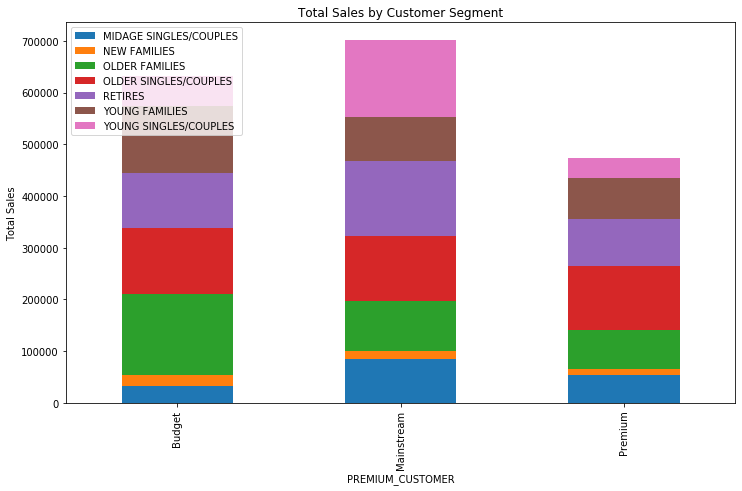

In [120]:
# Visualise


total_sale.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIRES','YOUNG FAMILIES',
'YOUNG SINGLES/COUPLES'], loc = 2)

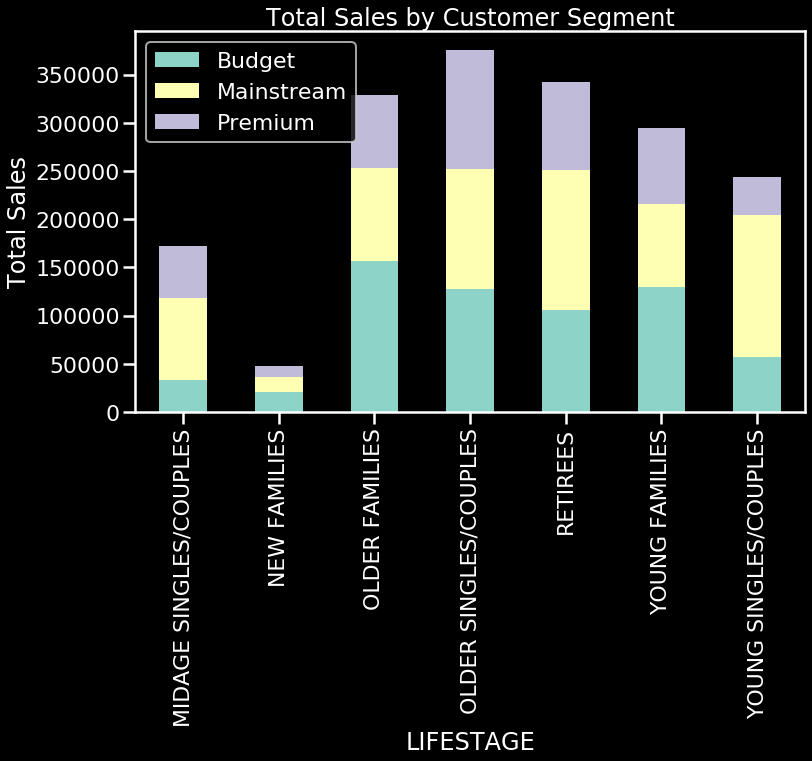

In [128]:
# Visualise

salesPlot = pd.DataFrame(final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Top 3 sales come from budget older families, mainstream young singles/couples and mainstream retirees.


In [123]:
final_data.LYLTY_CARD_NBR.nunique()

71287

In [124]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE

customers = pd.DataFrame(final_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 7917
                 RETIREES                              6358
                 OLDER SINGLES/COUPLES                 4858
Budget           OLDER SINGLES/COUPLES                 4849
Premium          OLDER SINGLES/COUPLES                 4682
Budget           OLDER FAMILIES                        4611
                 RETIREES                              4385
                 YOUNG FAMILIES                        3953
Premium          RETIREES                              3812
Budget           YOUNG SINGLES/COUPLES                 3647

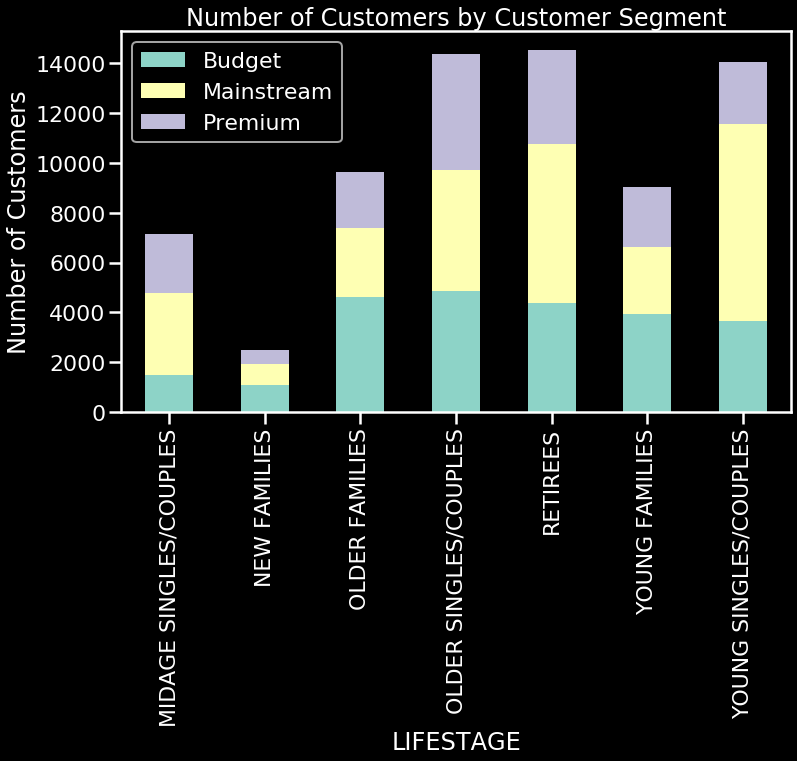

In [129]:
# Visualise

customersPlot = pd.DataFrame(final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

There are more mainstream young singles/couples and retirees. This contributes to to more chips sales in these segments however this is not the major driver for the budget older families segment.

Text(0, 0.5, 'Number of Customers')

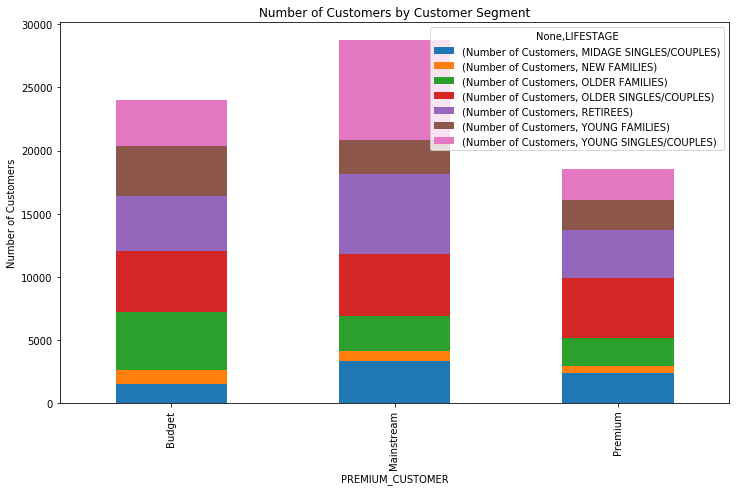

In [126]:
customers.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
#plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [127]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = final_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / final_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()


In [128]:
avg_units

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    6.026459
                  NEW FAMILIES              4.821527
                  OLDER FAMILIES            9.076773
                  OLDER SINGLES/COUPLES     6.781398
                  RETIREES                  6.141847
                  YOUNG FAMILIES            8.722995
                  YOUNG SINGLES/COUPLES     4.250069
Mainstream        MIDAGE SINGLES/COUPLES    6.432080
                  NEW FAMILIES              4.891566
                  OLDER FAMILIES            9.255380
                  OLDER SINGLES/COUPLES     6.712021
                  RETIREES                  5.925920
                  YOUNG FAMILIES            8.638361
                  YOUNG SINGLES/COUPLES     4.575597
Premium           MIDAGE SINGLES/COUPLES    6.078514
                  NEW FAMILIES              4.815652
                  OLDER FAMILIES            9.071717
                  OLDER SINGLES/COUPLES     6.769543
     

In [129]:
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


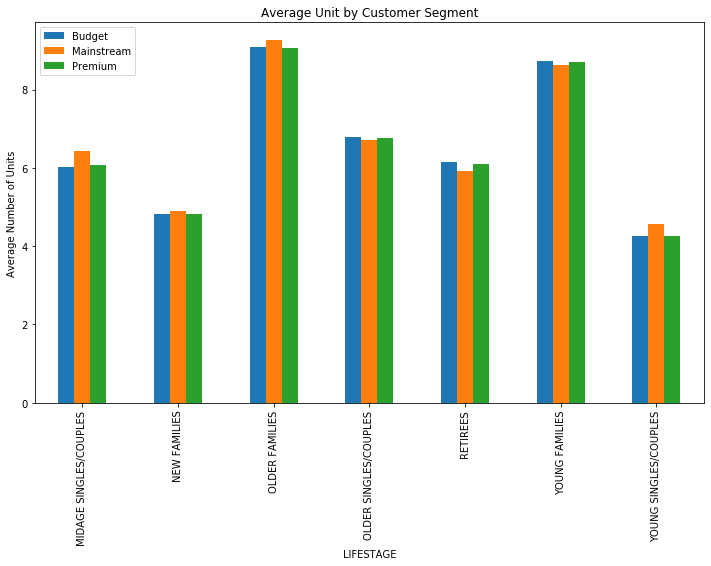

In [130]:
# Visualise 

avgUnitsPlot = pd.DataFrame(final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Older families and young families buy more chips per customer.

In [131]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE

avg_price = final_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / final_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()


Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969

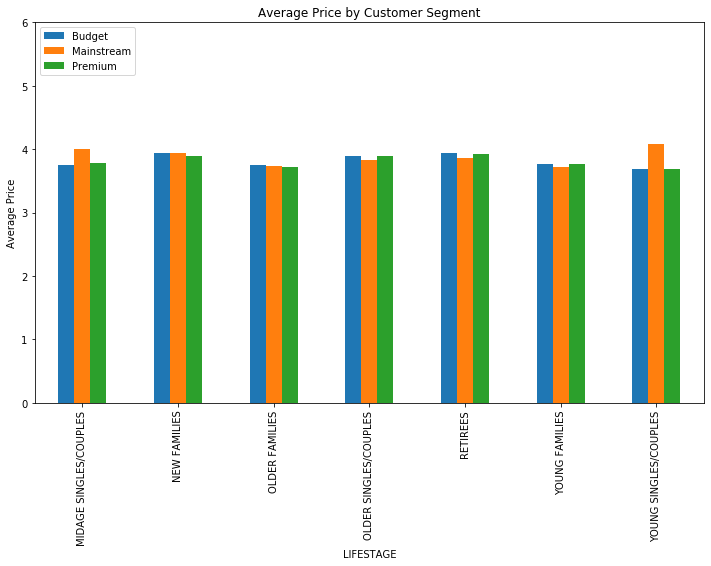

In [132]:
# Visualise 

avgPricePlot = pd.DataFrame(final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

In [130]:
# Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples to test this difference

# Create a new dataframe pricePerUnit
newdf = final_data.copy()

# Create a new column under pricePerUnit called PRICE
newdf['PRICE(per unit)'] = newdf['TOT_SALES'] / newdf['PROD_QTY']

# Let's have a look
newdf.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE(per unit)
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [131]:
# Let's group our data into mainstream and non-mainstream

mainstream = newdf.loc[(newdf['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (newdf['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (newdf['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE(per unit)']
nonMainstream = newdf.loc[(newdf['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (newdf['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (newdf['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE(per unit)']
mainstream

4692      4.4
4693      5.4
4694      3.7
4695      4.4
4696      4.6
         ... 
240884    3.8
240885    4.6
240886    3.7
240887    3.7
240888    4.2
Name: PRICE(per unit), Length: 30639, dtype: float64

Text(0.5, 0, 'Price per Unit')

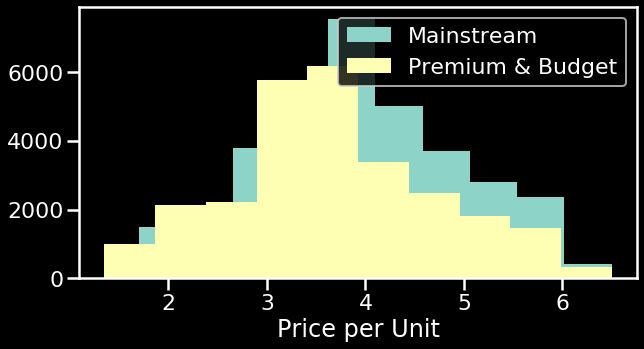

In [132]:
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [136]:
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(nonMainstream)))
if np.mean(mainstream) > np.mean(nonMainstream):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")

Mainstream average price per unit: $4.04
Non-mainstream average price per unit: $3.71
Mainstream customers have higher average price per unit. 


In [137]:
# Perform t-test 

ttest_ind(mainstream, nonMainstream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

We have found quite a few interesting insights that we can dive deeper into. For example, we might want to target customers segments that contribute the most to sales to retain them to further increase sales. 
- **Let's examine mainstream young singles/couples against the rest of the cutomer segments to see if they prefer any particular brand of chips.**

In [81]:
target = final_data.loc[(final_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (final_data['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = final_data.loc[(final_data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (final_data['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream
221346,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream
221347,2019-05-02,1,1020,28,84,Grnwves Plus Btroot Chilli Jam,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream
221348,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream
221349,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb Spce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream


In [82]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetSum

36225

In [83]:
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand['Target Brand Affinity']

221345    0.000028
221346    0.000028
221347    0.000028
221348    0.000028
221349    0.000028
            ...   
240884    0.000055
240885    0.000055
240886    0.000055
240887    0.000055
240888    0.000055
Name: Target Brand Affinity, Length: 19544, dtype: float64

In [84]:
targetBrand

,BRAND,PROD_QTY,Target Brand Affinity
221345,Smiths,1,0.000028
221346,Smiths,1,0.000028
221347,Grainwaves,1,0.000028
221348,Kettle,1,0.000028
221349,Natural,1,0.000028
...,...,...,...
240884,Cobs,2,0.000055
240885,Kettle,2,0.000055
240886,Pringles,2,0.000055
240887,Pringles,2,0.000055


In [85]:
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())
targetBrand

,Target Brand Affinity
BRAND,
Burger,0.002926
CCS,0.011180
Cheetos,0.008033
Cheezels,0.017971
Cobs,0.044638
Doritos,0.122761
French,0.003948
Grainwaves,0.032712
Infuzions,0.064679


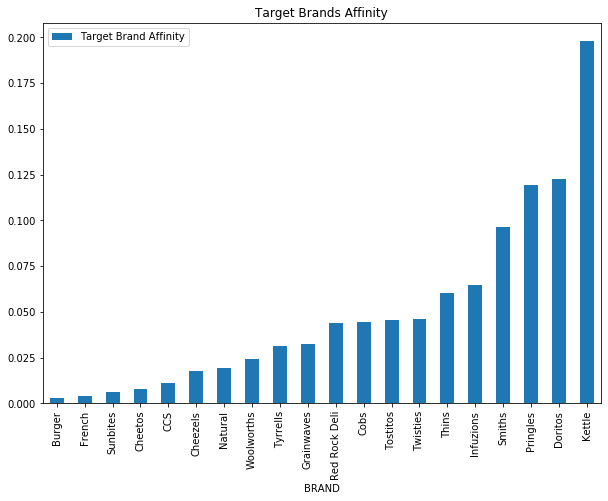

In [88]:
targetBrand.sort_values(by='Target Brand Affinity').plot(kind='bar',figsize=(10,7))
plt.title('Target Brands Affinity')
plt.show()

In [89]:
# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())
nonTargetBrand

,Non-Target Brand Affinity
BRAND,
Burger,0.006538
CCS,0.018445
Cheetos,0.011759
Cheezels,0.018904
Cobs,0.038449
Doritos,0.101171
French,0.005707
Grainwaves,0.031069
Infuzions,0.057410


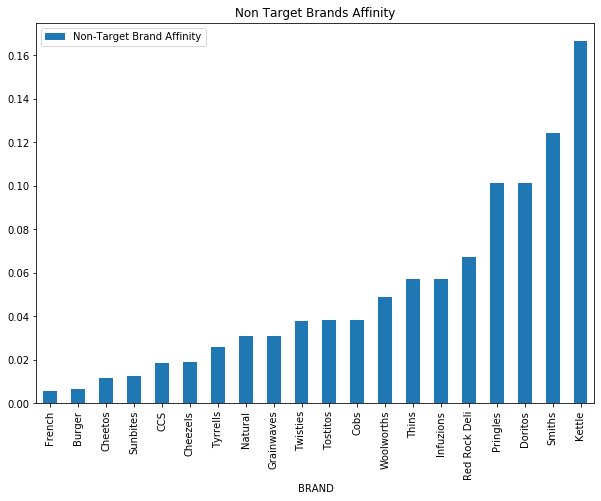

In [90]:
nonTargetBrand.sort_values(by='Non-Target Brand Affinity').plot(kind='bar',figsize=(10,7))
plt.title('Non Target Brands Affinity')
plt.show()

In [146]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002926,0.006538
CCS,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [147]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.